# Klasifikasi Gambar menggunakan SVM dan KNN
## Dengan Feature Extraction menggunakan Transfer Learning Resnet50

Notebook ini akan melakukan klasifikasi gambar peralatan dengan tahapan:
1. Persiapan dataset dan preprocessing
2. Ekstraksi fitur menggunakan model pre-trained
3. Implementasi klasifikasi dengan SVM dan KNN
4. Evaluasi dan analisis hasil

## Persyaratan
VScode : (https://code.visualstudio.com/download)

Python : 3.10.11 (https://www.python.org/downloads/release/python-31011/)

Installed Library Versions:
- NumPy: 1.26.4
- TensorFlow: 2.9.3
- Scikit-learn: 1.5.2
- Seaborn: 0.13.2
- Matplotlib: 3.9.2

## Struktur Dataset
Dataset harus memiliki struktur folder sebagai berikut:
```
dataset/
    ├── class1/
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   └── ...
    ├── class2/
    └── ...
```
### Import Library yang Dibutuhkan

In [ ]:
#!pip install numpy==1.26.4 tensorflow==2.9.3 scikit-learn==1.5.2 seaborn==0.13.2 matplotlib==3.9.2

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Memastikan penggunaan GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Konfigurasi Parameter

In [2]:
# Konfigurasi dasar
DATA_DIR = 'dataset_preprocessed'
IMG_SIZE = 224  # Ukuran standar untuk ResNet50
BATCH_SIZE = 32
RANDOM_STATE = 42

### Fungsi Utilitas untuk Loading dan Preprocessing Data

In [3]:
def load_and_preprocess_image(image_path):
    """Memuat dan memproses gambar untuk feature extraction."""
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    return img_array

def prepare_dataset():
    """Menyiapkan dataset dengan label."""
    images = []
    labels = []
    label_to_index = {}
    
    # Membaca semua kelas (folder) dalam dataset
    classes = sorted(os.listdir(DATA_DIR))
    for i, class_name in enumerate(classes):
        label_to_index[class_name] = i
        class_dir = os.path.join(DATA_DIR, class_name)
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            images.append(img_path)
            labels.append(i)
    
    return images, labels, label_to_index, classes

### Persiapan Model untuk Feature Extraction

In [4]:
# Memuat model ResNet50 tanpa layer klasifikasi
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    pooling='avg'
)

def extract_features(image_paths):
    """Mengekstrak fitur dari gambar menggunakan ResNet50."""
    features = []
    
    for i, path in enumerate(image_paths):
        if i % 100 == 0:
            print(f"Memproses gambar ke-{i}/{len(image_paths)}")
            
        img_array = load_and_preprocess_image(path)
        img_array = np.expand_dims(img_array, axis=0)
        features.append(base_model.predict(img_array, verbose=0))
    
    return np.vstack(features)

### Memuat dan Memproses Dataset

In [5]:
# Memuat dataset
image_paths, labels, label_to_index, classes = prepare_dataset()
print(f"Total gambar: {len(image_paths)}")
print(f"Kelas yang tersedia: {classes}")

# Membagi dataset
X_train_paths, X_test_paths, y_train, y_test = train_test_split(
    image_paths, labels, test_size=0.2, random_state=RANDOM_STATE, stratify=labels
)

# Ekstraksi fitur
print("\nMengekstrak fitur untuk data training...")
X_train = extract_features(X_train_paths)
print("\nMengekstrak fitur untuk data testing...")
X_test = extract_features(X_test_paths)

Total gambar: 1440
Kelas yang tersedia: ['alat_kupas', 'centong_nasi', 'garpu', 'gunting', 'pisau', 'sendok']

Mengekstrak fitur untuk data training...
Memproses gambar ke-0/1152
Memproses gambar ke-100/1152
Memproses gambar ke-200/1152
Memproses gambar ke-300/1152
Memproses gambar ke-400/1152
Memproses gambar ke-500/1152
Memproses gambar ke-600/1152
Memproses gambar ke-700/1152
Memproses gambar ke-800/1152
Memproses gambar ke-900/1152
Memproses gambar ke-1000/1152
Memproses gambar ke-1100/1152

Mengekstrak fitur untuk data testing...
Memproses gambar ke-0/288
Memproses gambar ke-100/288
Memproses gambar ke-200/288


### Implementasi dan Evaluasi Model SVM

Melatih model SVM...

Hasil Evaluasi SVM:
              precision    recall  f1-score   support

  alat_kupas       1.00      0.98      0.99        48
centong_nasi       1.00      1.00      1.00        48
       garpu       1.00      0.96      0.98        48
     gunting       1.00      1.00      1.00        48
       pisau       0.94      1.00      0.97        48
      sendok       1.00      1.00      1.00        48

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



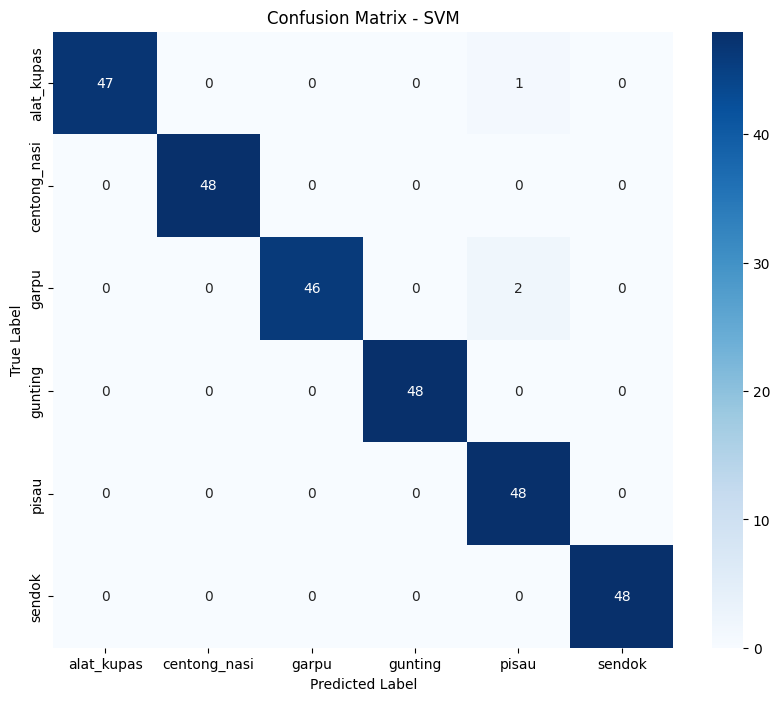

In [6]:
# Melatih model SVM
print("Melatih model SVM...")
svm_model = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm_model.fit(X_train, y_train)

# Evaluasi SVM
svm_predictions = svm_model.predict(X_test)
print("\nHasil Evaluasi SVM:")
print(classification_report(y_test, svm_predictions, target_names=classes))

# Visualisasi confusion matrix untuk SVM
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, svm_predictions),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes,
    yticklabels=classes
)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Implementasi dan Evaluasi Model KNN

Melatih model KNN...

Hasil Evaluasi KNN:
              precision    recall  f1-score   support

  alat_kupas       0.94      0.98      0.96        48
centong_nasi       0.87      0.98      0.92        48
       garpu       0.79      0.88      0.83        48
     gunting       1.00      1.00      1.00        48
       pisau       0.85      0.71      0.77        48
      sendok       1.00      0.90      0.95        48

    accuracy                           0.91       288
   macro avg       0.91      0.91      0.91       288
weighted avg       0.91      0.91      0.91       288



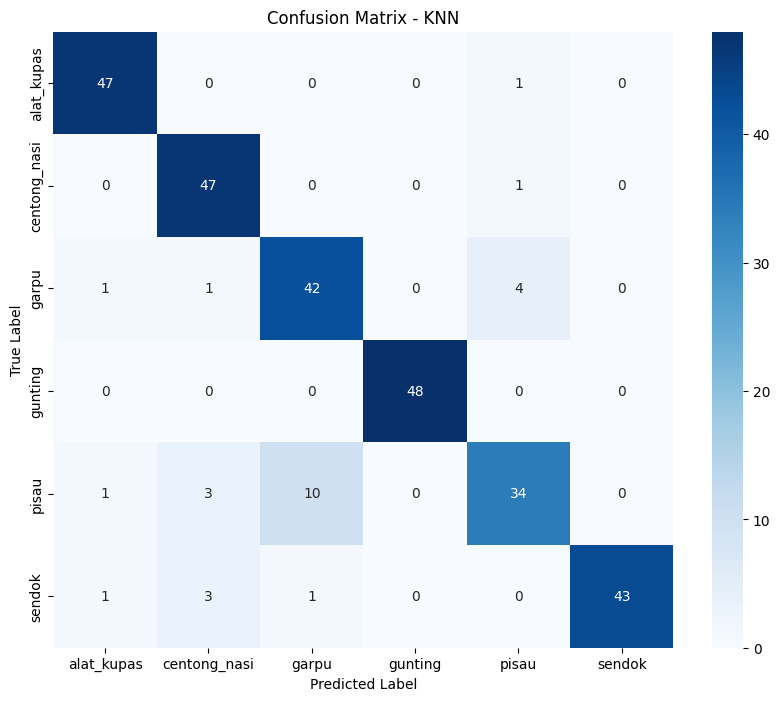

In [7]:
# Melatih model KNN
print("Melatih model KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluasi KNN
knn_predictions = knn_model.predict(X_test)
print("\nHasil Evaluasi KNN:")
print(classification_report(y_test, knn_predictions, target_names=classes))

# Visualisasi confusion matrix untuk KNN
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, knn_predictions),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes,
    yticklabels=classes
)
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [8]:
def plot_predictions(X_test_paths, y_test, predictions, classes, model_name, n_samples=5):
    """Memvisualisasikan prediksi benar dan salah."""
    # Mendapatkan indeks prediksi benar dan salah
    correct_idx = np.where(predictions == y_test)[0]
    wrong_idx = np.where(predictions != y_test)[0]
    
    # Mengambil sampel acak
    correct_samples = np.random.choice(correct_idx, min(n_samples, len(correct_idx)), replace=False)
    wrong_samples = np.random.choice(wrong_idx, min(n_samples, len(wrong_idx)), replace=False)
    
    # Plot prediksi benar
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Prediksi Benar - Model {model_name}', fontsize=16)
    
    for i, idx in enumerate(correct_samples):
        plt.subplot(1, n_samples, i+1)
        img = load_img(X_test_paths[idx], target_size=(IMG_SIZE, IMG_SIZE))
        plt.imshow(img)
        plt.title(f'True: {classes[y_test[idx]]}\nPred: {classes[predictions[idx]]}', fontsize=10)
        plt.axis('off')
    plt.show()
    
    # Plot prediksi salah
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Prediksi Salah - Model {model_name}', fontsize=16)
    
    for i, idx in enumerate(wrong_samples):
        plt.subplot(1, n_samples, i+1)
        img = load_img(X_test_paths[idx], target_size=(IMG_SIZE, IMG_SIZE))
        plt.imshow(img)
        plt.title(f'True: {classes[y_test[idx]]}\nPred: {classes[predictions[idx]]}', fontsize=10)
        plt.axis('off')
    plt.show()
    
    # Analisis kesalahan prediksi
    print(f"\nAnalisis Kesalahan Prediksi - Model {model_name}:")
    print("=====================================")
    for idx in wrong_samples:
        print(f"Gambar: {os.path.basename(X_test_paths[idx])}")
        print(f"Label Sebenarnya: {classes[y_test[idx]]}")
        print(f"Prediksi: {classes[predictions[idx]]}")
        print("-----------------------------------")

Visualisasi Prediksi Model SVM


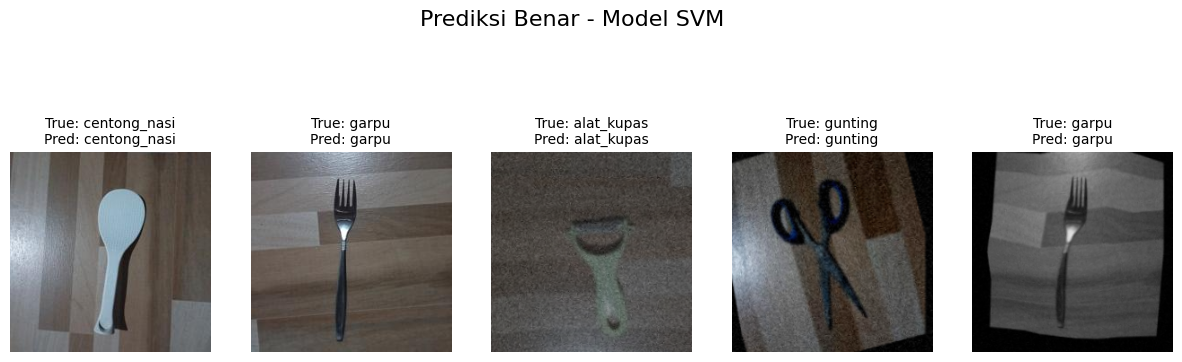

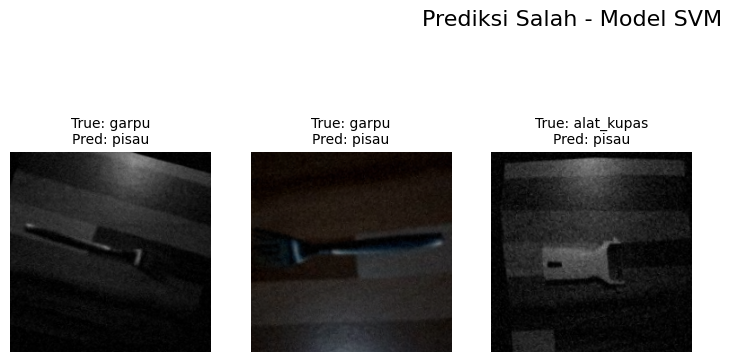


Analisis Kesalahan Prediksi - Model SVM:
Gambar: 1000101168_aug3_4.png
Label Sebenarnya: garpu
Prediksi: pisau
-----------------------------------
Gambar: 1000101168_aug2_3.png
Label Sebenarnya: garpu
Prediksi: pisau
-----------------------------------
Gambar: 1000101142_aug3_1.png
Label Sebenarnya: alat_kupas
Prediksi: pisau
-----------------------------------

Visualisasi Prediksi Model KNN


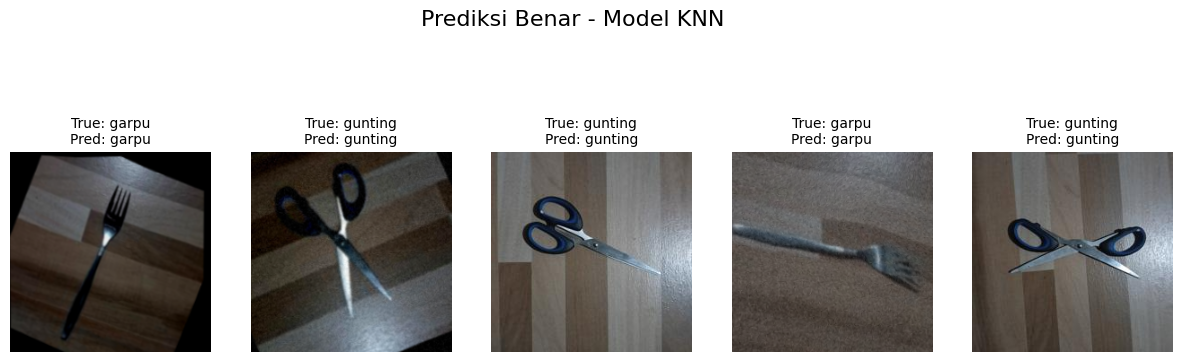

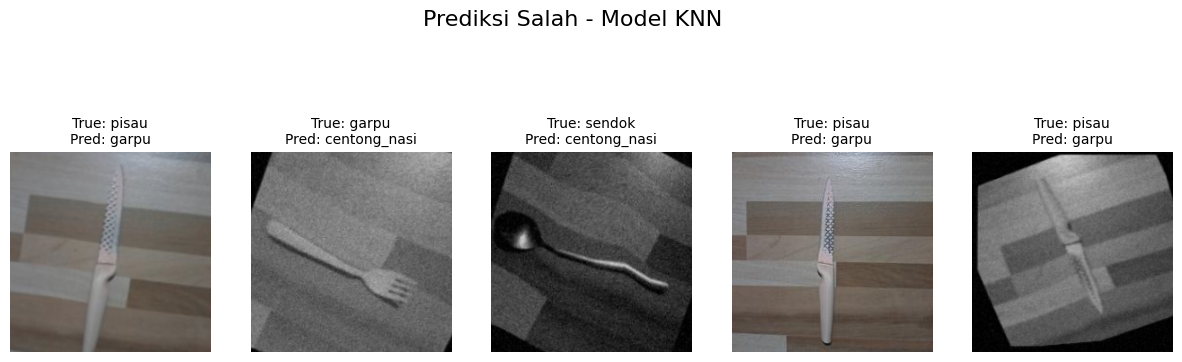


Analisis Kesalahan Prediksi - Model KNN:
Gambar: 1000101121_aug1_4.png
Label Sebenarnya: pisau
Prediksi: garpu
-----------------------------------
Gambar: 1000101177_aug3_0.png
Label Sebenarnya: garpu
Prediksi: centong_nasi
-----------------------------------
Gambar: 1000101185_aug3_2.png
Label Sebenarnya: sendok
Prediksi: centong_nasi
-----------------------------------
Gambar: 1000101117.jpg
Label Sebenarnya: pisau
Prediksi: garpu
-----------------------------------
Gambar: 1000101119_aug3_3.png
Label Sebenarnya: pisau
Prediksi: garpu
-----------------------------------


In [9]:
# Visualisasi prediksi model SVM
print("Visualisasi Prediksi Model SVM")
plot_predictions(X_test_paths, y_test, svm_predictions, classes, "SVM")

# Visualisasi prediksi model KNN
print("\nVisualisasi Prediksi Model KNN")
plot_predictions(X_test_paths, y_test, knn_predictions, classes, "KNN")

### Analisis Perbandingan Model

Berikut adalah analisis perbandingan antara model SVM dan KNN:

1. **Akurasi**: 
   - Model SVM: Dapat dilihat dari classification report di atas
   - Model KNN: Dapat dilihat dari classification report di atas
   
2. **Kelebihan dan Kekurangan**:
   - SVM:
     - Kelebihan: Efektif untuk data dimensi tinggi, robust terhadap outlier
     - Kekurangan: Waktu training yang lebih lama, memori yang lebih besar
   - KNN:
     - Kelebihan: Sederhana, mudah diimplementasikan
     - Kekurangan: Sensitif terhadap noise, computationally intensive saat prediksi

3. **Rekomendasi**:
   - Untuk dataset ini, model yang lebih baik dapat dilihat dari metrics di atas
   - Pertimbangkan trade-off antara akurasi dan kecepatan prediksi
   
4. **Potential Improvement**:
   - Feature selection untuk mengurangi dimensi
   - Grid search untuk optimasi hyperparameter
   - Augmentasi data tambahan jika diperlukan